# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from collections import deque

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from unityagents import UnityEnvironment

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
# Define DDPG

def ddpg(n_episodes=2000):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
    """
    scores = []                        # list containing scores from each episode
    mov_avg = []
    scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
        states = env_info.vector_observations              # get the current state
        agent.reset()
        score = np.zeros(num_agents)
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations      # get the next state
            rewards = env_info.rewards                      # get the reward  
            dones = env_info.local_done
            for state, action, reward, next_state in zip(states, actions, rewards, next_states):
                agent.step(state, action, reward, next_state)
            states = next_states
            score += rewards
            if any(dones):
                break        
        scores_window.append(score.max())        # save most recent score
        scores.append(score.max())               # save most recent score
        mov_avg.append(np.mean(scores_window))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mov_avg[-1]), end="")
        if i_episode % 20 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mov_avg[-1]))
        if mov_avg[-1]>=0.5 and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\n'
                  .format(i_episode-100, mov_avg[-1]))
            break
    return scores, mov_avg

In [6]:
agent = Agent(state_size, action_size, seed=0)
%time scores, mov_avg = ddpg(n_episodes=2000)

Episode 20	Average Score: 0.00
Episode 40	Average Score: 0.00
Episode 60	Average Score: 0.00
Episode 80	Average Score: 0.00
Episode 100	Average Score: 0.00
Episode 120	Average Score: 0.00
Episode 140	Average Score: 0.00
Episode 160	Average Score: 0.00
Episode 180	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 220	Average Score: 0.00
Episode 240	Average Score: 0.00
Episode 260	Average Score: 0.00
Episode 280	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 320	Average Score: 0.00
Episode 340	Average Score: 0.01
Episode 360	Average Score: 0.02
Episode 380	Average Score: 0.03
Episode 400	Average Score: 0.03
Episode 420	Average Score: 0.03
Episode 440	Average Score: 0.04
Episode 460	Average Score: 0.03
Episode 480	Average Score: 0.03
Episode 500	Average Score: 0.04
Episode 520	Average Score: 0.05
Episode 540	Average Score: 0.08
Episode 560	Average Score: 0.09
Episode 580	Average Score: 0.10
Episode 600	Average Score: 0.11
Episode 620	Average Score: 0.11
Episode 640	

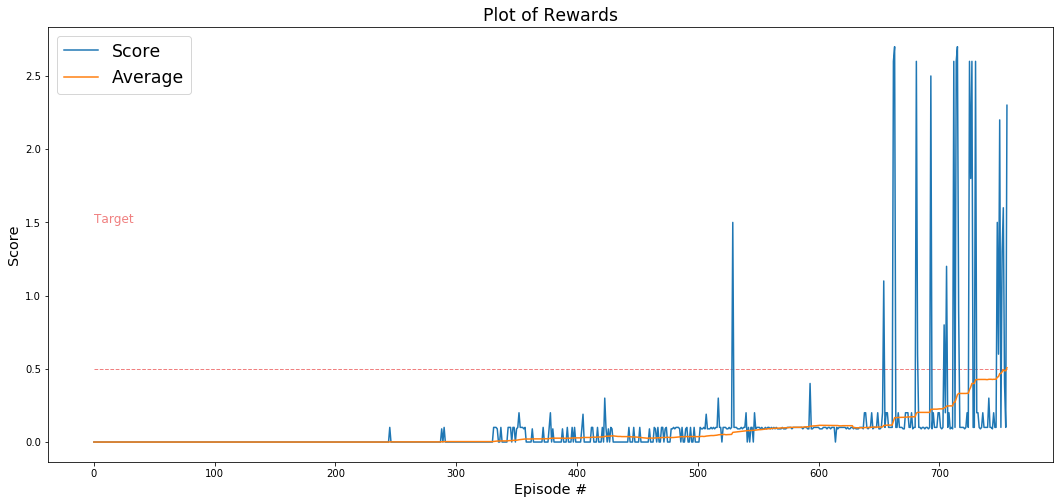

In [7]:
# Preprocess some variables
target_value = 0.5
target = [target_value] * len(scores) # Trace a line indicating the target value

# plot the scores
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.set_title('Plot of Rewards', fontsize='xx-large')
ax.plot(target, linestyle='--', color='LightCoral', linewidth=1, zorder=0)
ax.plot(np.arange(len(scores)), scores, label='Score')
ax.plot(np.arange(len(mov_avg)), mov_avg, label='Average')
ax.set_ylabel('Score', fontsize='x-large')
ax.set_xlabel('Episode #', fontsize='x-large')
ax.text(0, target_value+1, 'Target', color='LightCoral', fontsize='large')
ax.legend(fontsize='xx-large', loc='upper left')
plt.show()

In [8]:
## Save the model along with some training information
checkpoint = {
    'actor_dict': agent.actor_local.state_dict(),
    'critic_dict': agent.critic_local.state_dict(),
    'scores': scores,
    'mov_avg': mov_avg
    }
print('\nSaving model ...')
torch.save(checkpoint, 'checkpoint.pt')


Saving model ...


In [9]:
env.close()